<h2 align="center">Empowering Financial Security: Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics</h1>
<hr>

### Objective:

* Strengthen financial security by leveraging advanced machine learning techniques and predictive analytics to accurately detect and prevent fraudulent transactions
* Analyzing transaction patterns and identifying anomalies in real-time, this system aims to reduce financial risk, protect customer assets, and improve the efficiency of fraud prevention strategies in digital finance environments

**Submission by:-** Latha Reddy

<hr>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
payment_df = pd.read_csv('payment_fraud.csv')
payment_df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [4]:
# shape gives the information about how many rows and how many columns are exist in the dataseta
rows, cols = payment_df.shape
print(f'The dataset is having {rows} rows and {cols} columns')

The dataset is having 39221 rows and 8 columns


In [5]:
# info() gives the information about the column and Null values
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [6]:
# describe - gives the 5 point summary of data of numeric colums
payment_df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


#### Checking For Null Values

In [7]:
payment_df.isna().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [76]:
payment_df['Category'].value_counts(dropna=False)

Category
shopping       12339
food           11945
electronics    11809
NaN               95
Name: count, dtype: int64

In [9]:
payment_df['isWeekend'].value_counts(dropna=False)

isWeekend
0.0    19348
1.0    19313
NaN      560
Name: count, dtype: int64

#### Checking for duplicates

In [10]:
# Duplicates
print(f'The data has {payment_df.duplicated().sum()} duplicate records')

The data has 3033 duplicate records


In [11]:
payment_df = payment_df.drop_duplicates()

#### Treating Null Values

In [12]:
payment_df.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               396
label                     0
dtype: int64

In [13]:
payment_df['isWeekend'].value_counts()

isWeekend
0.0    17907
1.0    17885
Name: count, dtype: int64

In [14]:
payment_df.isnull().sum()/len(payment_df)*100

accountAgeDays          0.000000
numItems                0.000000
localTime               0.000000
paymentMethod           0.000000
paymentMethodAgeDays    0.000000
Category                0.262518
isWeekend               1.094285
label                   0.000000
dtype: float64

In [15]:
payment_df['Category'].value_counts()

Category
shopping       12339
food           11945
electronics    11809
Name: count, dtype: int64

In [16]:
payment_df[payment_df['isWeekend']==1]['label'].value_counts()

label
0    17885
Name: count, dtype: int64

In [17]:
payment_df[payment_df['isWeekend']==0]['label'].value_counts()

label
0    17907
Name: count, dtype: int64

In [18]:
payment_df[payment_df['label']==1]['isWeekend']

109     NaN
243     NaN
280     NaN
362     NaN
420     NaN
         ..
38830   NaN
38880   NaN
39005   NaN
39111   NaN
39183   NaN
Name: isWeekend, Length: 396, dtype: float64

In [19]:
payment_df['label'].value_counts()

label
0    35792
1      396
Name: count, dtype: int64

In [20]:
payment_df_imp = payment_df.copy()

In [21]:
payment_df_imp['isWeekend'] = payment_df_imp['isWeekend'].fillna(0.5)

In [22]:
payment_df_imp.isna().sum()

accountAgeDays           0
numItems                 0
localTime                0
paymentMethod            0
paymentMethodAgeDays     0
Category                95
isWeekend                0
label                    0
dtype: int64

In [23]:
payment_df_imp[(payment_df_imp['Category'] != 'shopping' )& (payment_df_imp['Category'] != 'electronics' )&(payment_df_imp['Category'] != 'food')]['label'].value_counts()

label
0    87
1     8
Name: count, dtype: int64

In [24]:
payment_df_imp['Category'].value_counts(dropna=False)

Category
shopping       12339
food           11945
electronics    11809
NaN               95
Name: count, dtype: int64

In [25]:
payment_df_imp[payment_df_imp['label']==1]['Category'].value_counts(dropna=False)

Category
shopping       134
electronics    127
food           127
NaN              8
Name: count, dtype: int64

In [26]:
payment_df_imp[payment_df_imp['label']==0]['Category'].value_counts(dropna=False)

Category
shopping       12205
food           11818
electronics    11682
NaN               87
Name: count, dtype: int64

In [27]:
payment_df_imp['Category'].mode()

0    shopping
Name: Category, dtype: object

In [28]:
payment_df_imp['Category'] = payment_df_imp['Category'].fillna(payment_df['Category'].mode()[0])

In [29]:
payment_df_imp['Category'].value_counts(dropna=False)

Category
shopping       12434
food           11945
electronics    11809
Name: count, dtype: int64

In [30]:
payment_df_imp.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

#### Categorizing numeric columns and categorical columns

In [31]:
payment_df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36188 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        36188 non-null  int64  
 1   numItems              36188 non-null  int64  
 2   localTime             36188 non-null  float64
 3   paymentMethod         36188 non-null  object 
 4   paymentMethodAgeDays  36188 non-null  float64
 5   Category              36188 non-null  object 
 6   isWeekend             36188 non-null  float64
 7   label                 36188 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ MB


In [32]:
numerical_cols = payment_df_imp.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_cols = payment_df_imp.select_dtypes(include=['object']).columns.to_list()

In [33]:
numerical_cols

['accountAgeDays',
 'numItems',
 'localTime',
 'paymentMethodAgeDays',
 'isWeekend',
 'label']

In [34]:
categorical_cols

['paymentMethod', 'Category']

#### Understanding the numerical data

In [35]:
# Understanding the numerical data

for category in numerical_cols:
    if payment_df_imp[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {payment_df_imp[category].nunique()} unique values')
        if payment_df_imp[category].nunique()<10:
            print(set(payment_df_imp[category].tolist()))
    print()

accountAgeDays has 1999 unique values

numItems has 14 unique values

localTime has 25 unique values

paymentMethodAgeDays has 17094 unique values

isWeekend has 3 unique values
{0.0, 1.0, 0.5}

label has 2 unique values
{0, 1}



#### Understanding the categorical data

In [36]:
# Understanding the numerical data

for category in categorical_cols:
    if payment_df_imp[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {payment_df_imp[category].nunique()} unique values')
        if payment_df_imp[category].nunique()<10:
            print(set(payment_df_imp[category].tolist()))
    print()

paymentMethod has 3 unique values
{'storecredit', 'paypal', 'creditcard'}

Category has 3 unique values
{'electronics', 'food', 'shopping'}



## Exploratory Data Analysis (EDA)
### Analysing the Columns
#### Heatmap between the columns


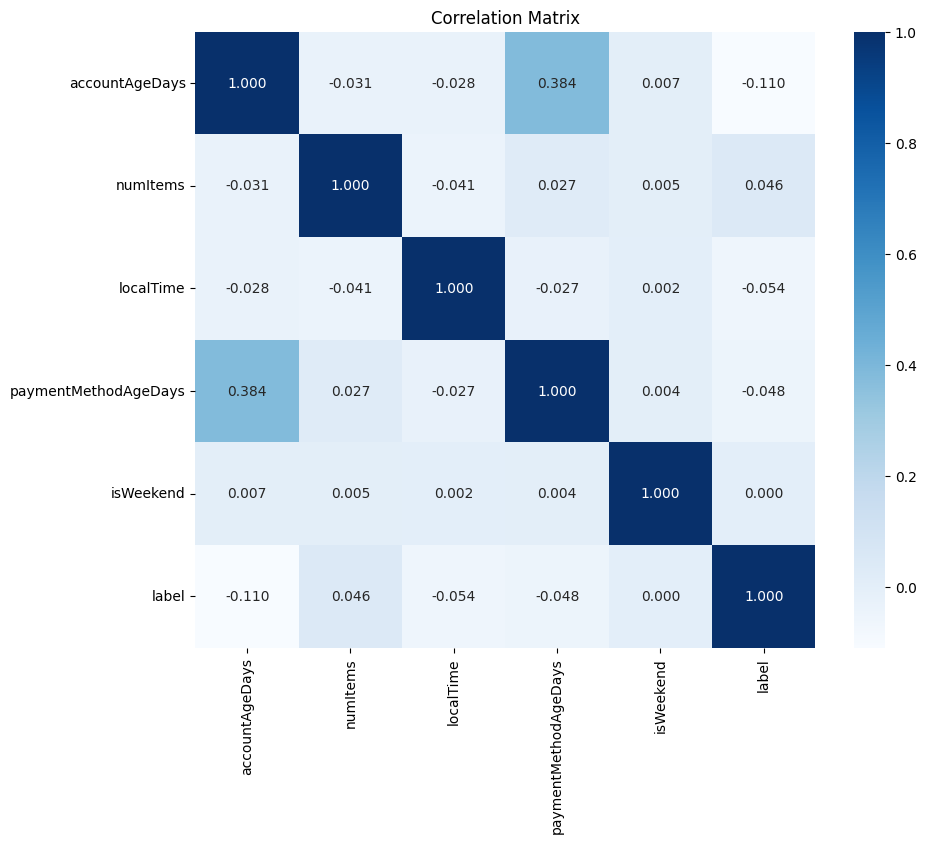

In [37]:
#Correlation heatmap to check relationships between features
plt.figure(figsize=(10,8))
sns.heatmap(payment_df_imp.corr(numeric_only=True), annot = True, cmap="Blues", fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

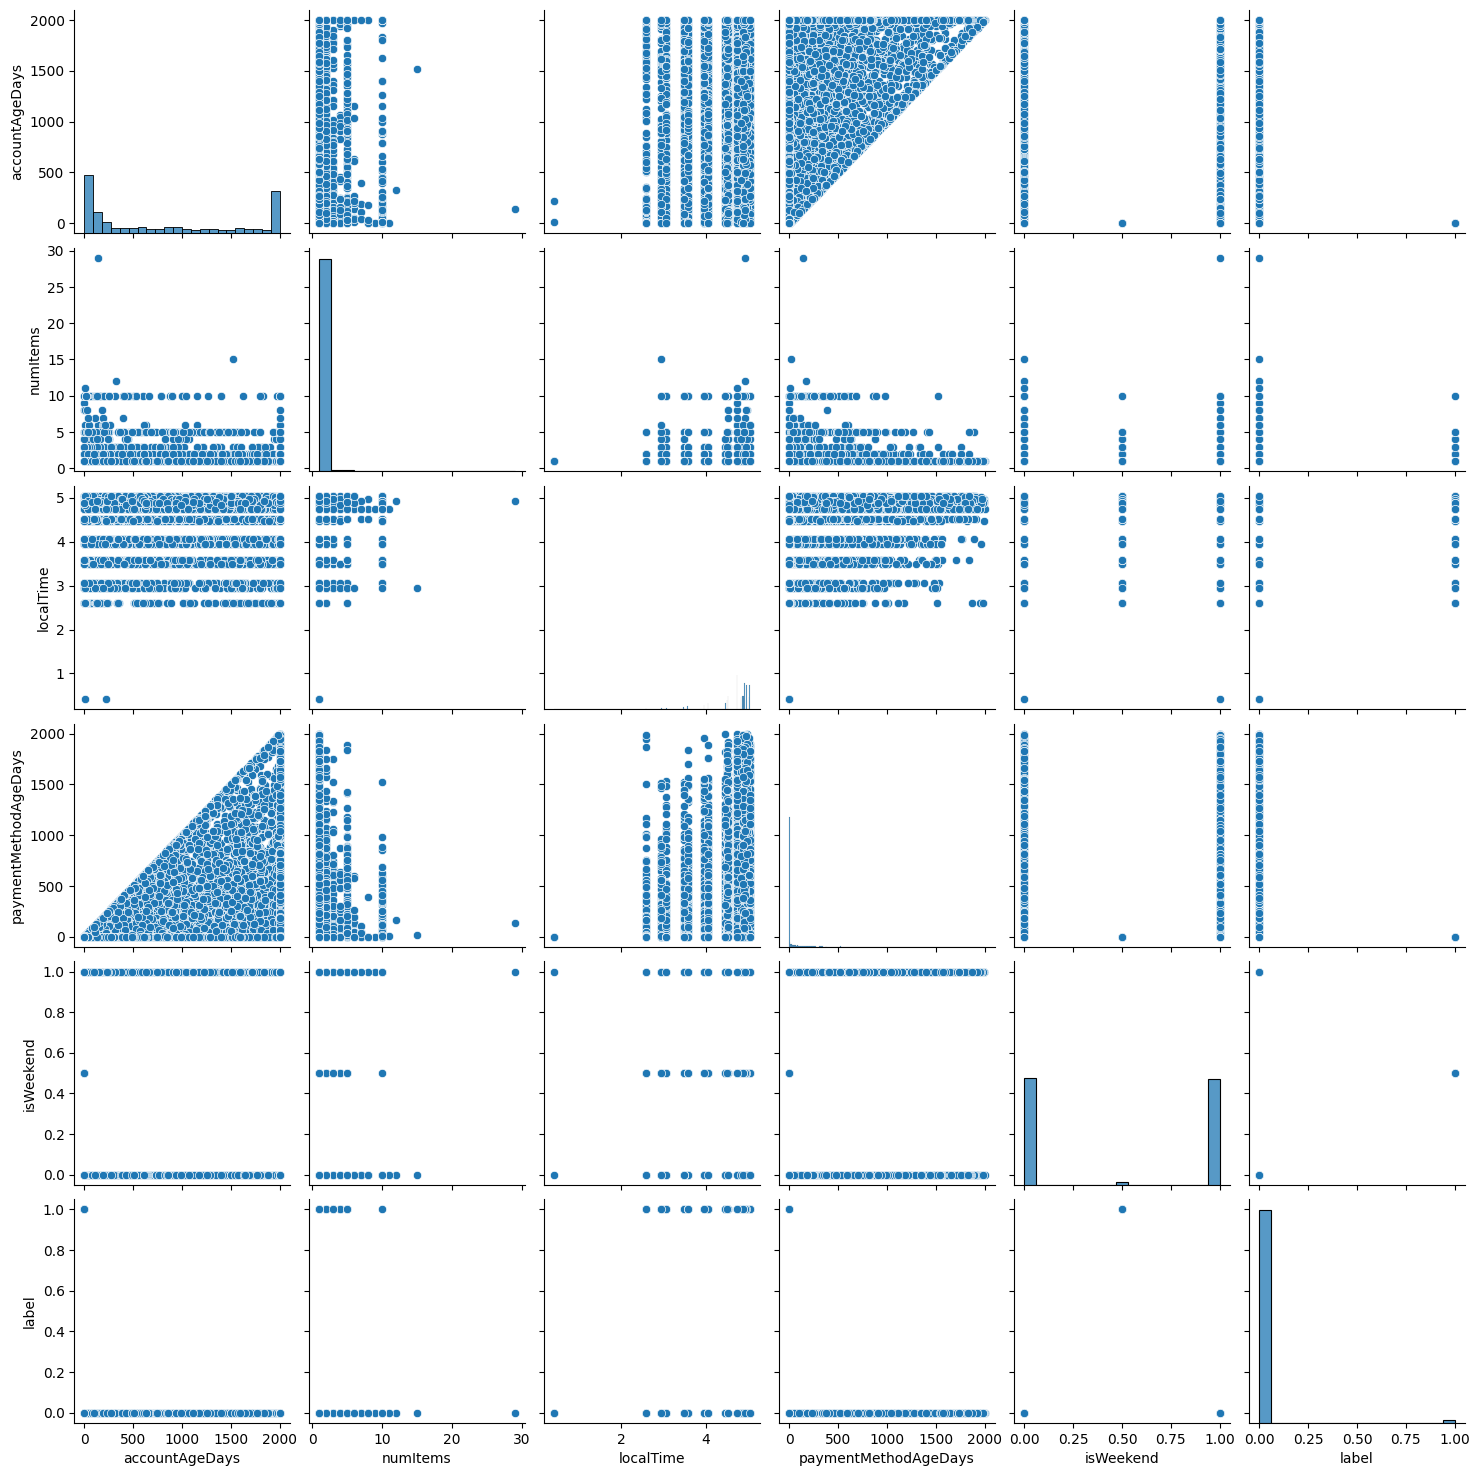

In [38]:
# Basic pairplot
sns.pairplot(payment_df_imp)

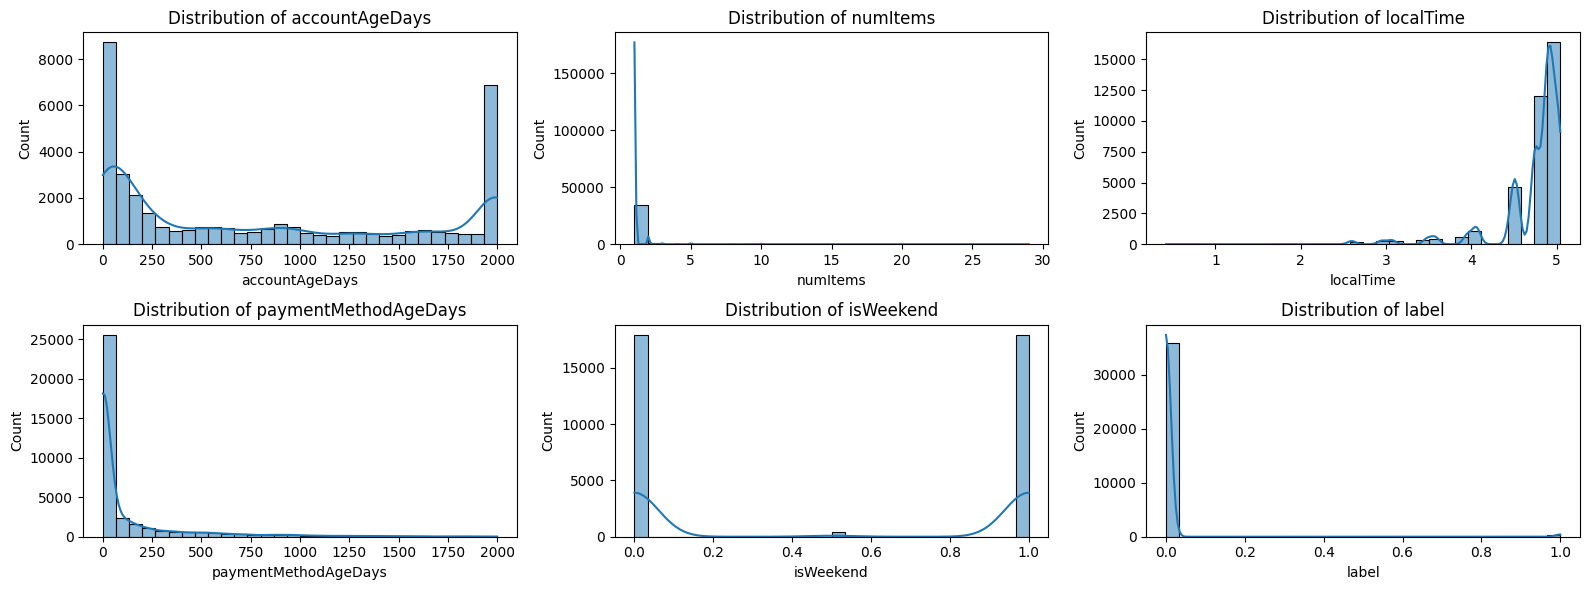

In [39]:
# Create distribution plots with Satisfaction hue
plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)  # Adjust grid layout based on number of columns
    sns.histplot(data=payment_df_imp, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

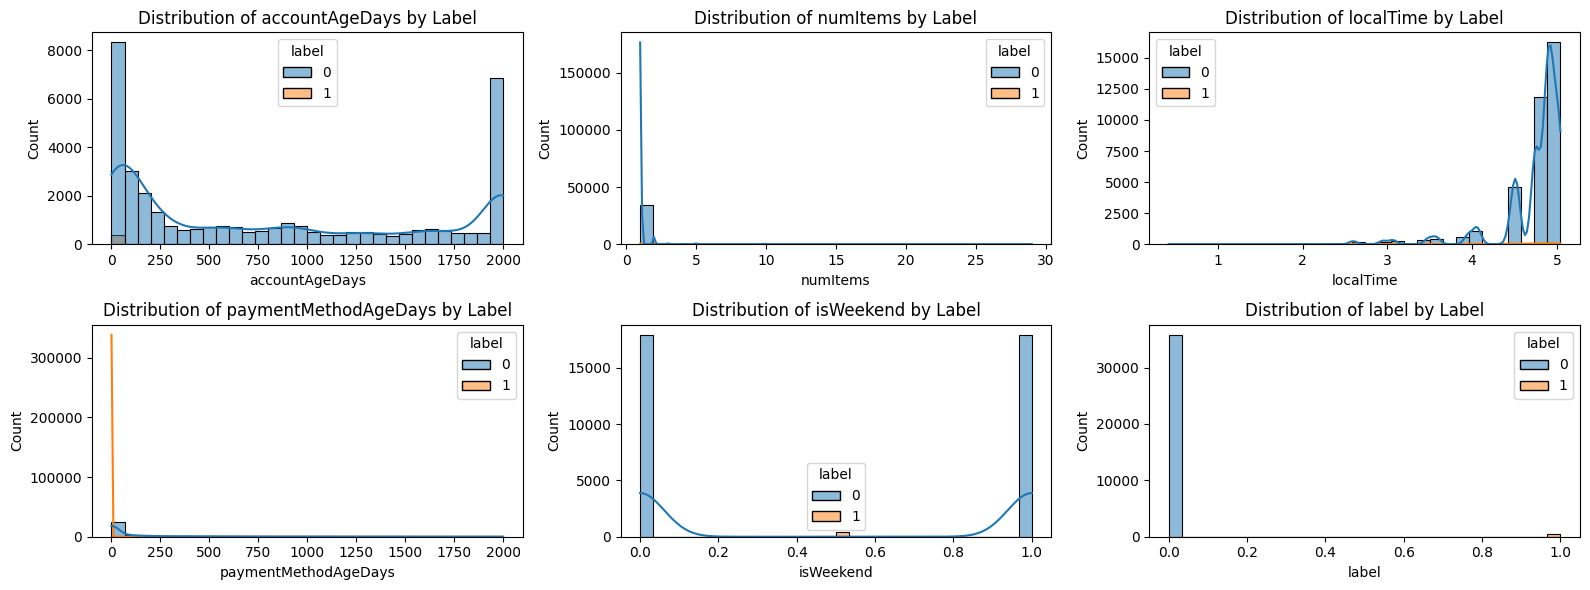

In [40]:
# Create distribution plots with Target column hue
plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)  # Adjust grid layout based on number of columns
    sns.histplot(data=payment_df_imp, x=col, hue="label", kde=True, bins=30)
    plt.title(f"Distribution of {col} by Label")

plt.tight_layout()
plt.show()

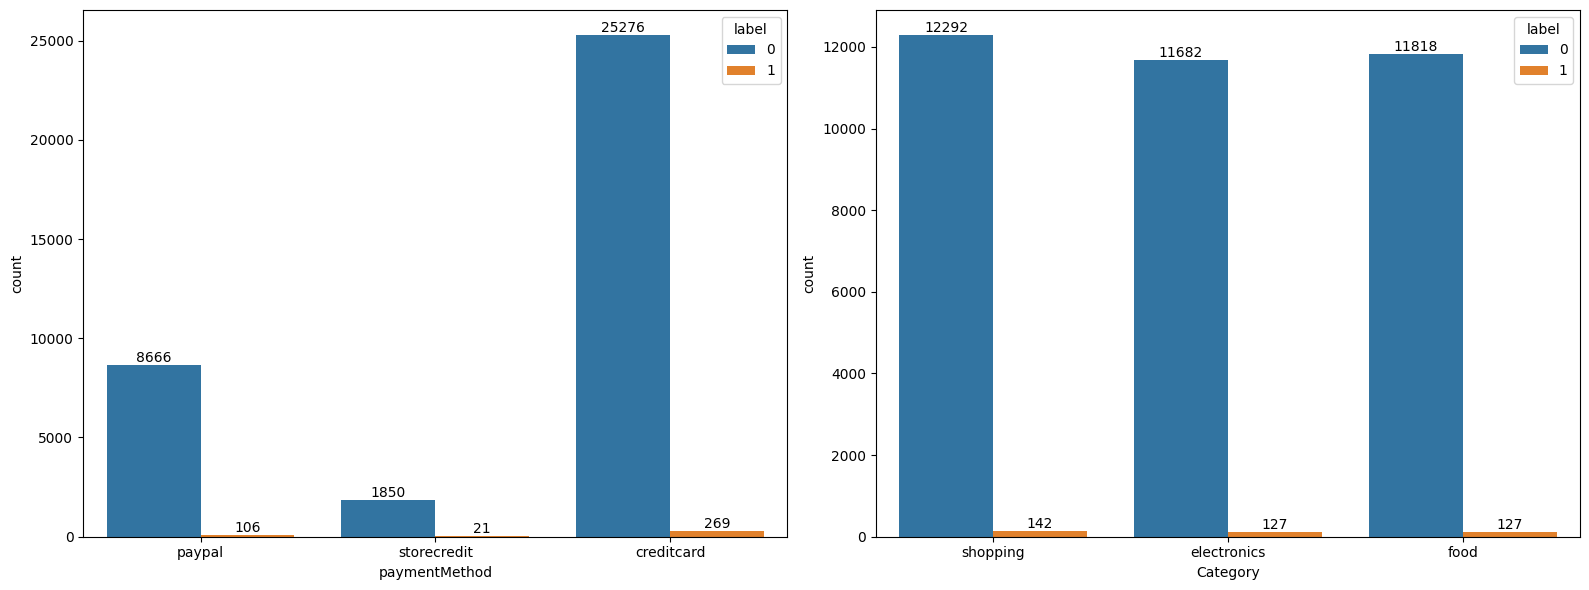

In [41]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)  # Adjust grid layout based on number of columns
    ax = sns.countplot(x=col, data=payment_df_imp, hue="label", stat='count')
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

#### Analysing the Target Column 'label'

In [42]:
#### Target Column 'label'
# Checking the data balance 
print('----------- Count -----------')
print(payment_df_imp['label'].value_counts())

print()
print('----------- Percent -----------')
print()
print(payment_df_imp['label'].value_counts()/len(payment_df_imp)*100)

print('\n\nWe have imbalanced data for model')

----------- Count -----------
label
0    35792
1      396
Name: count, dtype: int64

----------- Percent -----------

label
0    98.905715
1     1.094285
Name: count, dtype: float64


We have imbalanced data for model


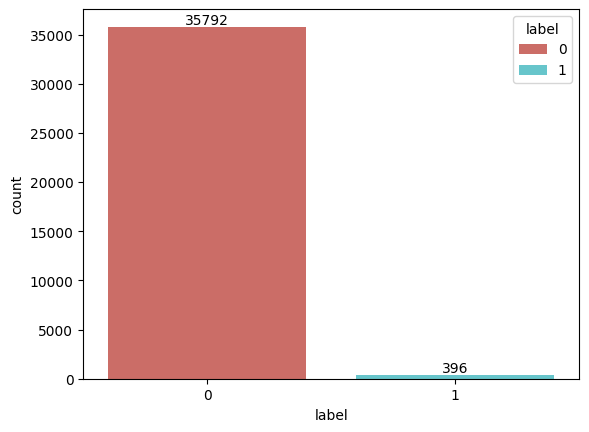

In [43]:
ax = sns.countplot(x='label', data=payment_df_imp, hue='label', palette='hls')
for container in ax.containers:
    ax.bar_label(container)

#### Encoding the Categorical Columns

In [44]:
# One-hot encoding for categorical columns with more than two categories
encoded_df = pd.get_dummies(payment_df_imp, columns=categorical_cols, dtype=int, drop_first=True)
encoded_df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,1,0,0,1
1,725,1,4.742303,0.000000,0.0,0,0,1,0,0
2,845,1,4.921318,0.000000,1.0,0,0,0,1,0
3,503,1,4.886641,0.000000,1.0,0,0,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,0,0,0,1


#### Splitting the data to x and y

In [45]:
# All features except target feature
x = encoded_df.drop('label', axis=1)

# Target feature
y = encoded_df['label']

#### Handling the Imbalanced data with SMOTE (Synthetic Minority Over-sampling Technique)

In [46]:
from imblearn.over_sampling import SMOTE
x_balanced, y_balanced = SMOTE().fit_resample(x,y)

In [47]:
x_balanced

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,1,0,0,1
1,725,1,4.742303,0.000000,0.0,0,1,0,0
2,845,1,4.921318,0.000000,1.0,0,0,1,0
3,503,1,4.886641,0.000000,1.0,0,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
71579,1,1,4.817707,0.347912,0.5,0,0,0,1
71580,1,1,4.921323,0.003531,0.5,1,0,0,1
71581,1,1,4.809772,0.004504,0.5,1,0,1,0
71582,1,1,4.057414,0.006272,0.5,0,0,0,0


In [48]:
y_balanced

0        0
1        0
2        0
3        0
4        0
        ..
71579    1
71580    1
71581    1
71582    1
71583    1
Name: label, Length: 71584, dtype: int64

In [49]:
y_balanced.value_counts()

label
0    35792
1    35792
Name: count, dtype: int64

#### Splitting data into train and test

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=12)

### Feature Scaling

In [52]:
# Feature Scaling - to scale/normalise the variables into same scale
# we do it after splitting into train and test - to avoid data leakage 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Selection

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [54]:
# All classifier model results will store in Results dictionary to compare the models
Results = {}

In [55]:
def model_evaluation(model):
    # Predict on the train set
    y_train_pred = model.predict(x_train_scaled)

    # Predict on the test set
    y_pred = model.predict(x_test_scaled)

    # Probabilities for ROC-AUC
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]  

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print("<---------------Accuracy Score------------------->")

    print(f"Training Accuracy:: {train_accuracy:.2f}")
    print(f"Testing Accuracy:: {accuracy:.2f}")

    print("\n<-------------------Classification Metrix---------------------->")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    print("\n<-------------------Confusion Matrix---------------------->")
    print("\nConfusion Matrix:\n", conf_matrix)

    print("\n<-------------------Classification Report---------------------->")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize confusion matrix
    sns.heatmap(conf_matrix, fmt='d', annot=True, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test)")
    plt.show()
    
    # Return metrics as a list
    return [accuracy, precision, recall, f1, roc_auc]

#### Logistic Regression

<---------------Accuracy Score------------------->
Training Accuracy:: 0.94
Testing Accuracy:: 0.94

<-------------------Classification Metrix---------------------->
Precision: 0.89
Recall: 1.00
F1 Score: 0.94
ROC-AUC Score: 0.99

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[6118  904]
 [   0 7295]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      7022
           1       0.89      1.00      0.94      7295

    accuracy                           0.94     14317
   macro avg       0.94      0.94      0.94     14317
weighted avg       0.94      0.94      0.94     14317



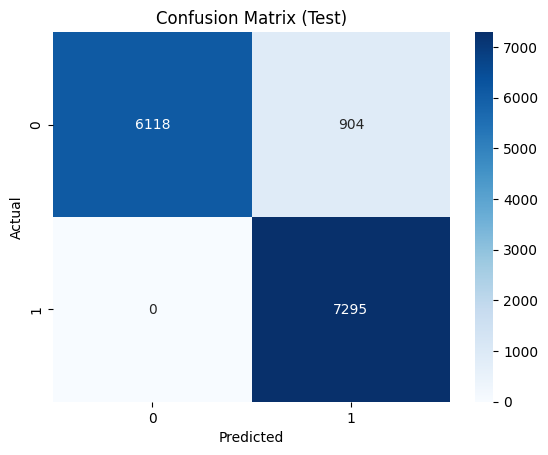

In [56]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=12)

# Train the model
logistic_model.fit(x_train_scaled, y_train)

Results['Logistic_Regression'] = model_evaluation(logistic_model)

#### Decision Tree Classifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7022    0]
 [   0 7295]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



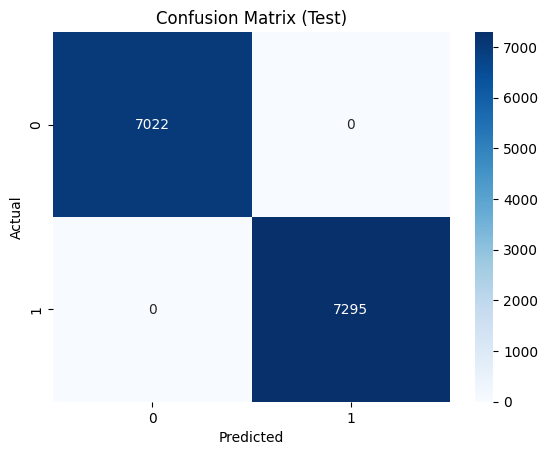

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [57]:
#DT Intialization
DT_model = DecisionTreeClassifier(random_state=12)

# Training the model
DT_model.fit(x_train_scaled, y_train)

# Storing the evaluation matrix in Results dictionary
Results['Decision_Tree'] = model_evaluation(DT_model)
Results

#### Random Forest Classifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7022    0]
 [   0 7295]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



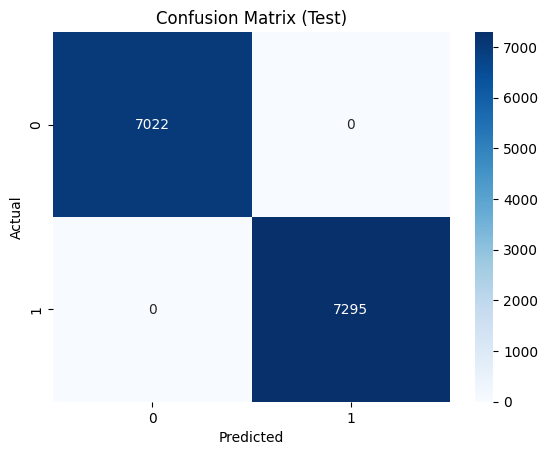

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Random_Forest': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [58]:
# Initialize the model
RF_model = RandomForestClassifier(random_state=12)

# Train the model with test data
RF_model.fit(x_train_scaled, y_train)

Results['Random_Forest'] = model_evaluation(RF_model)
Results

#### Gradien Boosting Classifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7022    0]
 [   0 7295]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



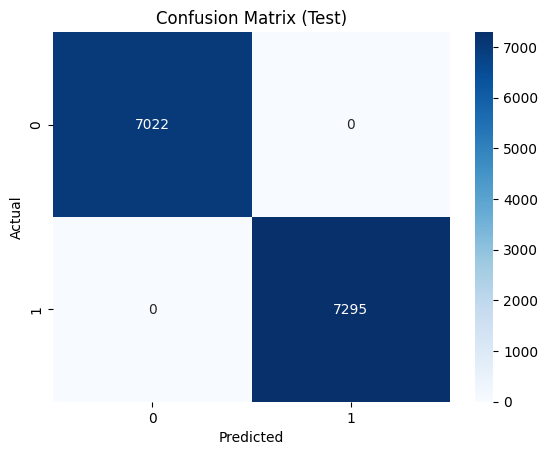

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Random_Forest': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Gradient_Boosting': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [59]:
# Initialize the Gradient Boosting model
GB_model = GradientBoostingClassifier(random_state=12)

# Train the model 
GB_model.fit(x_train_scaled, y_train)

Results['Gradient_Boosting'] = model_evaluation(GB_model)
Results

#### KNN Neighbour Classifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7009   13]
 [   1 7294]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



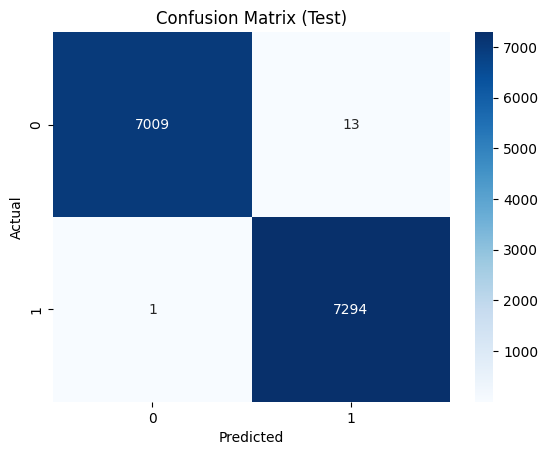

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Random_Forest': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Gradient_Boosting': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KNN_Model': [0.9990221415100929,
  0.9982208840837553,
  0.9998629198080877,
  0.9990412272291467,
  0.9997884354058887]}

In [60]:
# Model Initialization
KNN_Model = KNeighborsClassifier()

# Train the model
KNN_Model.fit(x_train_scaled, y_train)

Results['KNN_Model'] = model_evaluation(KNN_Model)
Results

#### XG Boost Classifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7022    0]
 [   0 7295]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



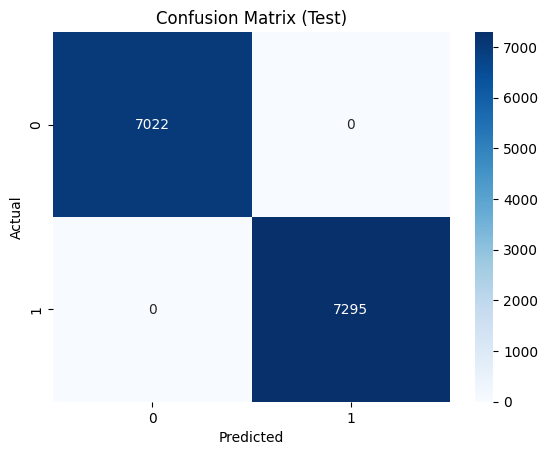

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Random_Forest': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Gradient_Boosting': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KNN_Model': [0.9990221415100929,
  0.9982208840837553,
  0.9998629198080877,
  0.9990412272291467,
  0.9997884354058887],
 'XGBoost': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [61]:
# Initialize the XGBoost classifier
XG_model = XGBClassifier(random_state=12, verbosity=0)

# Train the model
XG_model.fit(x_train_scaled, y_train)

Results['XGBoost'] = model_evaluation(XG_model)
Results

### Support Vector Machine (SVM)

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7021    1]
 [   0 7295]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



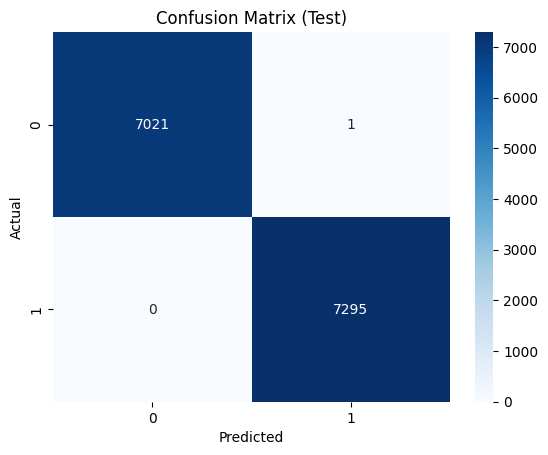

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Random_Forest': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Gradient_Boosting': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KNN_Model': [0.9990221415100929,
  0.9982208840837553,
  0.9998629198080877,
  0.9990412272291467,
  0.9997884354058887],
 'XGBoost': [1.0, 1.0, 1.0, 1.0, 1.0],
 'SVM': [0.9999301529650066, 0.9998629385964912, 1.0, 0.9999314646014666, 1.0]}

In [62]:
# Intializing the model
svm_model = SVC(random_state=12, probability=True)

# Train the model
svm_model.fit(x_train_scaled, y_train)

Results['SVM'] = model_evaluation(svm_model)
Results

#### Guassian Naive Bayes 

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 1.00

<-------------------Classification Metrix---------------------->
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[7022    0]
 [  36 7259]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7022
           1       1.00      1.00      1.00      7295

    accuracy                           1.00     14317
   macro avg       1.00      1.00      1.00     14317
weighted avg       1.00      1.00      1.00     14317



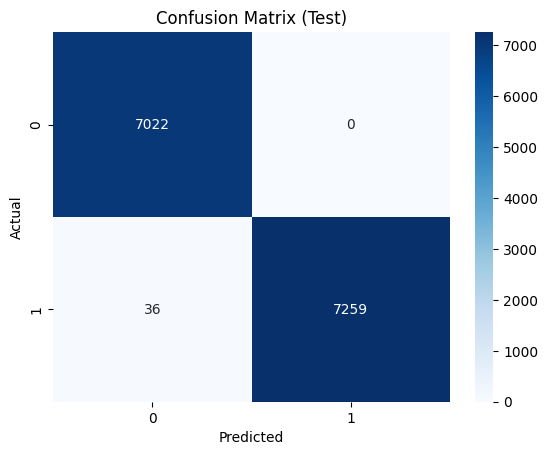

{'Logistic_Regression': [0.9368582803659985,
  0.8897426515428711,
  1.0,
  0.9416548341293404,
  0.9864392512399588],
 'Decision_Tree': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Random_Forest': [1.0, 1.0, 1.0, 1.0, 1.0],
 'Gradient_Boosting': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KNN_Model': [0.9990221415100929,
  0.9982208840837553,
  0.9998629198080877,
  0.9990412272291467,
  0.9997884354058887],
 'XGBoost': [1.0, 1.0, 1.0, 1.0, 1.0],
 'SVM': [0.9999301529650066, 0.9998629385964912, 1.0, 0.9999314646014666, 1.0],
 'Gaussian NB': [0.9974855067402388,
  1.0,
  0.9950651130911583,
  0.9975264532087399,
  1.0]}

In [63]:

# Intializing the model
gnb_model = GaussianNB()

# Train the Model 
gnb_model.fit(x_train_scaled, y_train)

Results['Gaussian NB'] = model_evaluation(gnb_model)
Results

In [64]:
Columns = ['Accuracy','Precision', 'Recall', 'F1 Score', 'ROC AUC']
pd.DataFrame(Results, index=Columns).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic_Regression,0.936858,0.889743,1.000000,0.941655,0.986439
Decision_Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Random_Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient_Boosting,1.000000,1.000000,1.000000,1.000000,1.000000
KNN_Model,0.999022,0.998221,0.999863,0.999041,0.999788
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
SVM,0.999930,0.999863,1.000000,0.999931,1.000000
Gaussian NB,0.997486,1.000000,0.995065,0.997526,1.000000


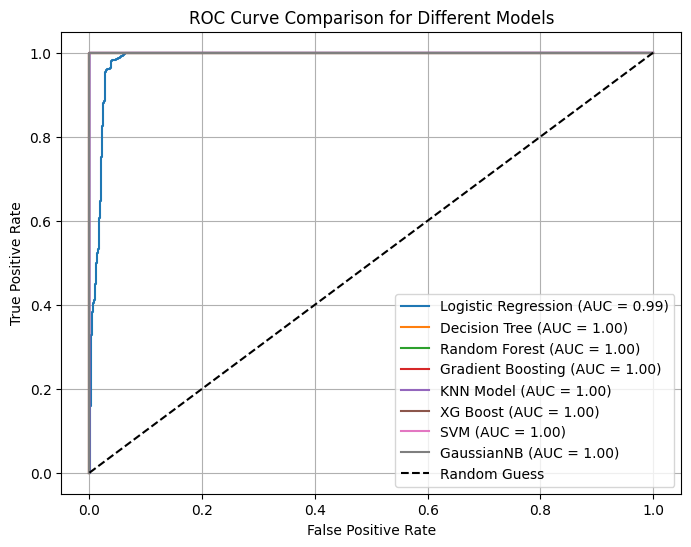

In [65]:
# Initialize models
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": DT_model,
    "Random Forest": RF_model,
    "Gradient Boosting": GB_model,
    "KNN Model": KNN_Model,
    "XG Boost": XG_model,
    "SVM": svm_model,
    "GaussianNB": gnb_model
}

plt.figure(figsize=(8, 6))

# Loop through models and plot ROC curve
for name, model in models.items():
    y_probs = model.predict_proba(x_test_scaled)[:, 1]  # Get probability estimates
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Different Models")
plt.legend()
plt.grid()
plt.show()

In [66]:
Columns = ['Accuracy','Precision', 'Recall', 'F1 Score', 'ROC AUC']
pd.DataFrame(Results, index=Columns).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic_Regression,0.936858,0.889743,1.000000,0.941655,0.986439
Decision_Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Random_Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient_Boosting,1.000000,1.000000,1.000000,1.000000,1.000000
KNN_Model,0.999022,0.998221,0.999863,0.999041,0.999788
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
SVM,0.999930,0.999863,1.000000,0.999931,1.000000
Gaussian NB,0.997486,1.000000,0.995065,0.997526,1.000000


#### Dropping the isWeekend column

In [67]:
encoded_df

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,1,0,0,1
1,725,1,4.742303,0.000000,0.0,0,0,1,0,0
2,845,1,4.921318,0.000000,1.0,0,0,0,1,0
3,503,1,4.886641,0.000000,1.0,0,0,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,0.0,0,0,0,0,1
39217,1647,1,4.876771,377.930556,0.0,0,0,0,0,1
39218,1591,1,4.742303,0.000000,1.0,0,0,0,0,1
39219,237,1,4.921318,236.082639,1.0,0,0,0,0,1


In [68]:
x_features = x_balanced.drop(columns=['isWeekend'])
x_features

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,1,0,0,1
1,725,1,4.742303,0.000000,0,1,0,0
2,845,1,4.921318,0.000000,0,0,1,0
3,503,1,4.886641,0.000000,0,0,0,0
4,2000,1,5.040929,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...
71579,1,1,4.817707,0.347912,0,0,0,1
71580,1,1,4.921323,0.003531,1,0,0,1
71581,1,1,4.809772,0.004504,1,0,1,0
71582,1,1,4.057414,0.006272,0,0,0,0


In [69]:
x_features_train, x_features_test, y_class_train, y_class_test = train_test_split(x_features, y_balanced, test_size=0.2, random_state=12)

In [70]:
# Scaling
sc = StandardScaler()
x_features_train_scaled = sc.fit_transform(x_features_train)
x_features_test_scaled = sc.transform(x_features_test)

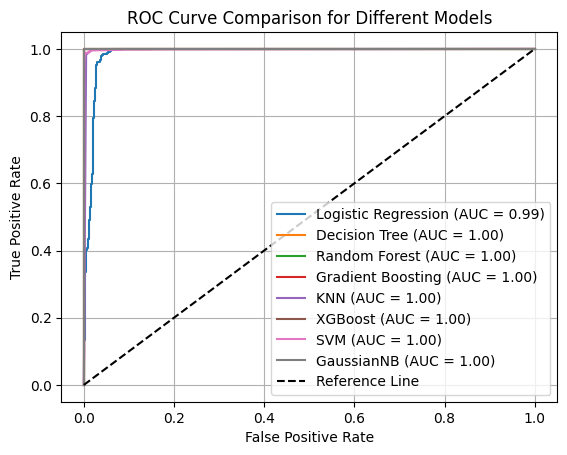

In [71]:
# Initialize models
accuracy_scores = {}
classifier_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "GaussianNB": GaussianNB()
}

for model_name, model in classifier_models.items():
    if model_name in ['Logistic Regression','KNN','SVM']:
        model.fit(x_features_train_scaled, y_class_train)
        y_feature_pred = model.predict(x_features_test_scaled)
        y_probs = model.predict_proba(x_features_test_scaled)[:, 1]  # Get probability estimates
    else: 
        model.fit(x_features_train, y_class_train)
        y_feature_pred = model.predict(x_features_test)
        y_probs = model.predict_proba(x_features_test)[:, 1]  # Get probability estimates
        
    accuracy = accuracy_score(y_class_test, y_feature_pred)
    accuracy_scores[model_name] = accuracy
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label="Reference Line")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Different Models")
plt.legend()
plt.grid()
plt.show()


In [72]:
pd.DataFrame(accuracy_scores, index=['Model Name', 'Accuracy']).T

,Model Name,Accuracy
Logistic Regression,0.936719,0.936719
Decision Tree,1.000000,1.000000
Random Forest,1.000000,1.000000
Gradient Boosting,1.000000,1.000000
KNN,0.988755,0.988755
XGBoost,1.000000,1.000000
SVM,0.921282,0.921282
GaussianNB,0.996717,0.996717


#### Cross Validation Score

In [73]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_results = {}
for name, model in classifier_models.items():
    scores = cross_val_score(model, x_features, y_balanced, cv=5)  # 5-fold CV
    cv_results[name] = np.mean(scores)

# Print results
for name, score in cv_results.items():
    print(f"{name}: {score:.4f}")

Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
KNN: 0.9998
XGBoost: 1.0000
SVM: 0.9485
GaussianNB: 0.9966


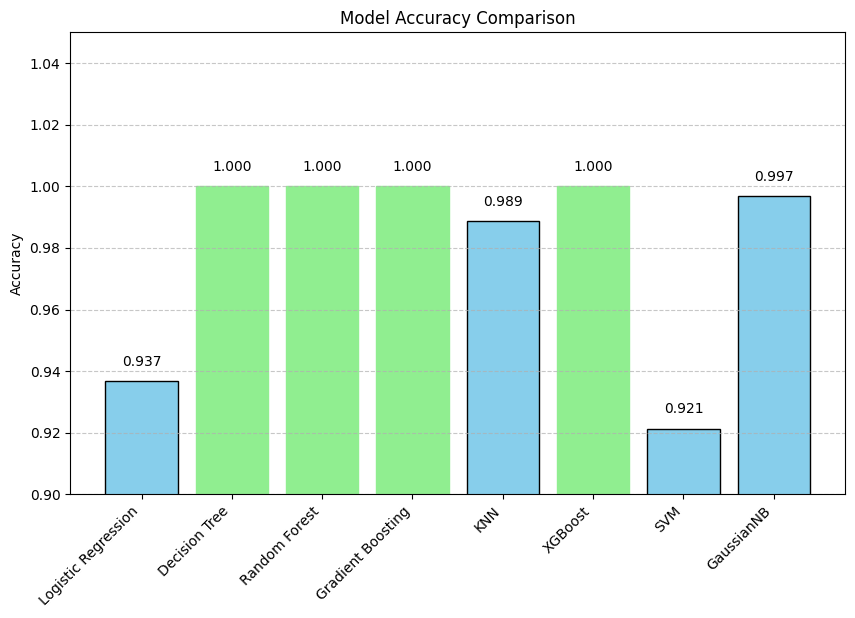

In [74]:

# Create figure
plt.figure(figsize=(10, 6))

# Extract keys and values
models = list(accuracy_scores.keys())
accuracy = list(accuracy_scores.values())

# Create bars
bars = plt.bar(models, accuracy, color='skyblue', edgecolor='black')

# Highlight models with perfect accuracy in green
for i, acc in enumerate(accuracy):
    if acc == 1.0:
        bars[i].set_color('lightgreen')

# Add accuracy labels on bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', fontsize=10)

# Customize chart
plt.ylim(0.9, 1.05)  # Focus on high accuracy range
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show chart
plt.show()

In [75]:
accuracy_scores

{'Logistic Regression': 0.9367185862960117,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'Gradient Boosting': 1.0,
 'KNN': 0.9887546273660683,
 'XGBoost': 1.0,
 'SVM': 0.9212823915624782,
 'GaussianNB': 0.9967171893553118}

## Model Selection & Final Model
<hr />

 __Conclusion on Fraudalent Detection__

 __Key Observations__
 
Tree-based models (Decision Tree, Random Forest, Gradient Boosting, XGBoost) achieved perfect accuracy. This could mean:

The dataset is either very clean, easy to classify, or small enough for overfitting to occur.

GaussianNB also performed exceptionally well (99.6%), which suggests that the features may roughly follow the Gaussian distribution assumption.

KNN had very high accuracy (98.9%), showing that the data is well-clustered in feature space.

Logistic Regression and SVM performed slightly lower, but still good, indicating that the data may not be fully linearly separable.